In [1]:
import pandas as pd
import json
import numpy as np

df_co2 = pd.read_csv('../../data/raw_data/annual-co-emissions.csv')
df_energy = pd.read_csv('../../data/raw_data/primary-energy-cons/primary-energy-cons.csv')
df_gdp = pd.read_csv('../../data/raw_data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2.csv',skiprows=4)
df_pop = pd.read_csv('../../data/raw_data/API_SP.POP.TOTL_DS2_en_csv_v2_56/API_SP.POP.TOTL_DS2_en_csv_v2_56.csv', skiprows=4)


In [2]:
df_gdp = df_gdp.rename(columns={
    "Country Name": "Entity",
    "Country Code": "Code"
})

df_gdp = df_gdp.drop(columns=["Indicator Name", "Indicator Code", "Code"], errors='ignore')

df_gdp_cleaned = df_gdp.loc[:, ~df_gdp.columns.str.contains('^Unnamed')]

df_gdp_melted = df_gdp_cleaned.melt(
    id_vars=["Entity"],
    var_name="Year",
    value_name="GDP"
)


df_gdp_sorted = df_gdp_melted.sort_values(by= ["Entity", "Year"])

print(df_gdp_sorted.head())


           Entity  Year  GDP
2     Afghanistan  1960  NaN
268   Afghanistan  1961  NaN
534   Afghanistan  1962  NaN
800   Afghanistan  1963  NaN
1066  Afghanistan  1964  NaN


In [3]:
df_pop = df_pop.rename(columns={
    "Country Name": "Entity",
    "Country Code": "Code"
})

df_pop = df_pop.drop(columns=["Indicator Name", "Indicator Code","Code"], errors='ignore')

df_pop_cleaned = df_pop.loc[:, ~df_gdp.columns.str.contains('^Unnamed')]

df_pop_melted = df_pop_cleaned.melt(
    id_vars=["Entity",],
    var_name="Year",
    value_name="Population"
)


df_pop_sorted = df_pop_melted.sort_values(by= ["Entity", "Year"])

#print(df_pop_sorted.head())

In [4]:
df_co2 = df_co2.sort_values(by=['Entity', 'Year'])
df_energy = df_energy.sort_values(by=['Entity', 'Year'])

In [5]:
#df_co2.head()

In [6]:
#df_energy.head()

In [7]:
# Filter rows where 'Code' column is not null in both datasets
df_co2_sorted = df_co2 [df_co2 ['Code'].notnull()]
df_energy_sorted = df_energy[df_energy['Code'].notnull()]  # Assuming similar filtering applies to energy dataset

df_energy_sorted = df_energy_sorted.drop(columns=["Code"], errors='ignore')
df_co2_sorted = df_co2_sorted.drop(columns=["Code"], errors='ignore')
# List unique values from the 'Entity' column in the filtered CO2 dataset
#unique_entities_co2 = df_co2_sorted['Entity'].unique()
#unique_entities_co2
#unique_entities_energy = df_energy_sorted['Entity'].unique()
#unique_entities_energy

In [8]:
#df_co2_sorted.head()
print(df_co2_sorted['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Grenada'
 '

In [9]:
#df_energy_sorted.head()
print(df_energy_sorted['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Germany' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenl

In [10]:
#df_gdp_sorted.head()
print(df_gdp_sorted['Entity'].unique())

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD countries)'
 'East Asia & Pacific (excluding high income)' 'Ecu

In [11]:
#df_pop_sorted.head()
print(df_pop_sorted['Entity'].unique())

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD countries)'
 'East Asia & Pacific (excluding high income)' 'Ecu

In [12]:
# Convert 'Year' column to integer in all datasets
df_co2_sorted['Year'] = df_co2_sorted['Year'].astype(int)
df_energy_sorted['Year'] = df_energy_sorted['Year'].astype(int)
df_gdp_sorted['Year'] = df_gdp_sorted['Year'].astype(int)
df_pop_sorted['Year'] = df_pop_sorted['Year'].astype(int)


In [13]:
# Merge the datasets on 'Entity' and 'Year'
merged_df = df_co2_sorted.merge(df_energy_sorted, on=["Entity", "Year"], how="outer")
merged_df = merged_df.merge(df_gdp_sorted, on=["Entity", "Year"], how="outer")
merged_df = merged_df.merge(df_pop_sorted, on=["Entity", "Year"], how="outer")

# Sort the merged dataframe by 'Entity' and 'Year'
merged_df_sorted = merged_df.sort_values(by=["Entity", "Year"])

# Select and reorder the desired columns
final_df = merged_df_sorted[["Entity", "Year", "Annual CO₂ emissions", 
                              "Primary energy consumption (TWh)", "GDP", "Population"]]

# Display the first few rows of the final dataframe
print(final_df.head())


        Entity  Year  Annual CO₂ emissions  Primary energy consumption (TWh)  \
0  Afghanistan  1949               14656.0                               NaN   
1  Afghanistan  1950               84272.0                               NaN   
2  Afghanistan  1951               91600.0                               NaN   
3  Afghanistan  1952               91600.0                               NaN   
4  Afghanistan  1953              106256.0                               NaN   

   GDP  Population  
0  NaN         NaN  
1  NaN         NaN  
2  NaN         NaN  
3  NaN         NaN  
4  NaN         NaN  


In [14]:
entities = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda",
    "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain",
    "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan",
    "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros",
    "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czechia", "Taiwan"
    "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea",
    "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon",
    "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea",
    "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary", "Iceland",
    "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica",
    "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea", "Kosovo", "Kuwait",
    "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya",
    "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia",
    "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico",
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique",
    "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua",
    "Niger", "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines",
    "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda",
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia",
    "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands",
    "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname",
    "Sweden", "Switzerland", "Syria", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste",
    "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan",
    "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States",
    "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe",
    "Korea, Rep.", "American Samoa", "Anguilla", "Aruba", "Bahamas, The", "Bermuda",
    "Brunei Darussalam", "Cape Verde", "Congo, Dem. Rep.", "Congo, Rep.", "Cook Islands",
    "Cote d'Ivoire", "Curacao", "Egypt, Arab Rep.", "Gambia, The", "Greenland", "Guam",
    "Hong Kong SAR, China", "Hong Kong" "Iran, Islamic Rep.", "Isle of Man",
    "Korea, Dem. People's Rep.", "Korea, Rep.", "Kyrgyz Republic", "Lao PDR", "Macao",
    "Macao SAR, China", "Micronesia (country)", "Montserrat", "New Caledonia", "Niue",
    "Northern Mariana Islands", "Palestine", "Puerto Rico", "Reunion", "Russian Federation",
    "Saint Helena", "Saint Pierre and Miquelon", "Sint Maarten (Dutch part)", "Slovak Republic",
    "St. Kitts and Nevis", "St. Lucia", "St. Martin (French part)", "St. Vincent and the Grenadines",
    "Syrian Arab Republic", "Turkiye", "Turks and Caicos Islands",
    "United States Virgin Islands", "Venezuela, RB", "Viet Nam", "Virgin Islands (U.S.)",
    "Wallis and Futuna", "West Bank and Gaza", "Yemen, Rep."
]

print(entities)


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'TaiwanDemocratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israe

In [15]:
final_df= final_df[final_df['Entity'].isin(entities)]
final_df = final_df[final_df["Year"] <= 2020]

final_df.head()

,Entity,Year,Annual CO₂ emissions,Primary energy consumption (TWh),GDP,Population
0,Afghanistan,1949,14656.0,NaN,NaN,NaN
1,Afghanistan,1950,84272.0,NaN,NaN,NaN
2,Afghanistan,1951,91600.0,NaN,NaN,NaN
3,Afghanistan,1952,91600.0,NaN,NaN,NaN
4,Afghanistan,1953,106256.0,NaN,NaN,NaN


In [16]:
non_country_rows = final_df[~final_df['Entity'].isin(entities)]

print(non_country_rows['Entity'].unique())


[]


In [17]:
final_df = final_df.dropna()
final_df.head()

,Entity,Year,Annual CO₂ emissions,Primary energy consumption (TWh),GDP,Population
51,Afghanistan,2000,1047127.94,5.913606,3.521418e+09,19542982.0
52,Afghanistan,2001,1069098.00,4.664077,2.813572e+09,19688632.0
53,Afghanistan,2002,1340995.00,4.428160,3.825701e+09,21000256.0
54,Afghanistan,2003,1559602.00,5.207662,4.520947e+09,22645130.0
55,Afghanistan,2004,1237247.00,4.810372,5.224897e+09,23553551.0


In [18]:
# pip install seaborn

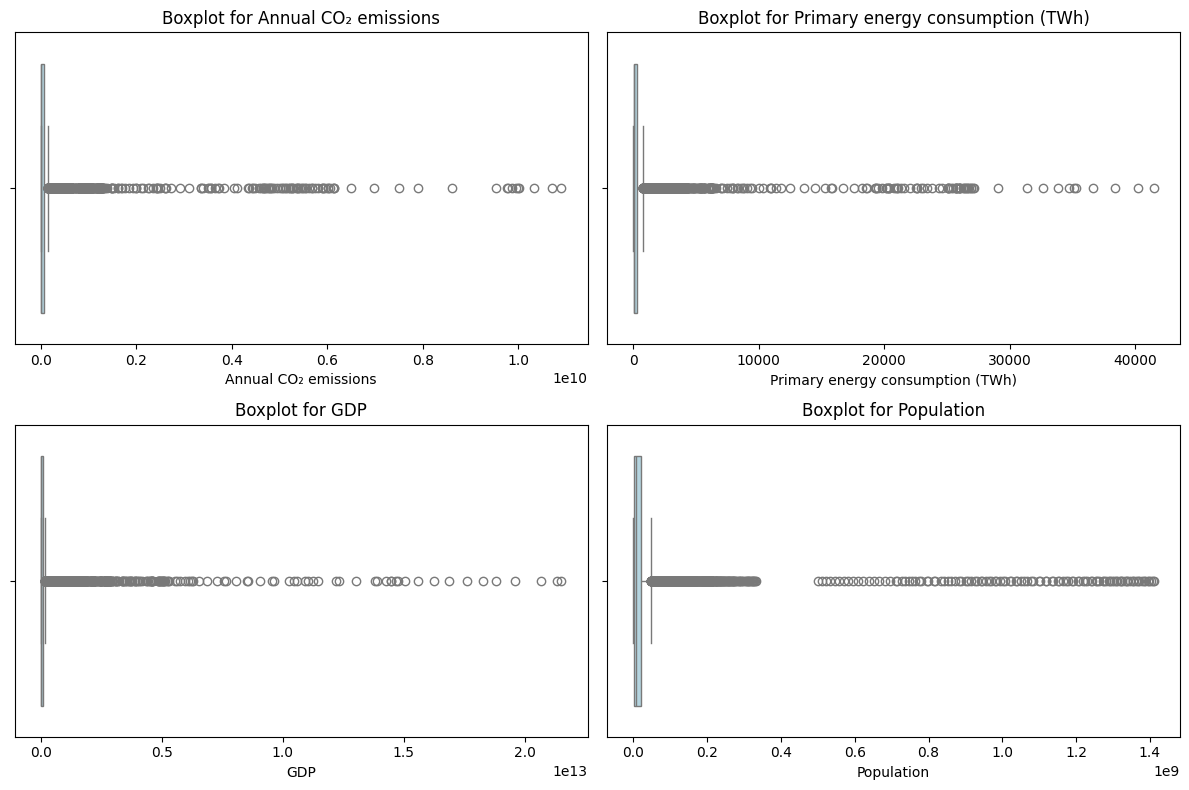

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Using boxplots to identify outliers in the data
plt.figure(figsize=(12, 8))

columns_to_analyze = ['Annual CO₂ emissions', 
                      'Primary energy consumption (TWh)', 
                      'GDP', 
                      'Population']

# Generate boxplots for each column
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=final_df[column], color="lightblue")
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt

log_transformed_data = final_df.copy()
variables_to_transform = ['Annual CO₂ emissions', 
                          'Primary energy consumption (TWh)', 
                          'GDP', 
                          'Population']

for var in variables_to_transform:
    log_transformed_data[f'Log {var}'] = np.log(final_df[var] + 1)  # Add 1 to avoid log(0)

for var in variables_to_transform:
    plt.figure(figsize=(10, 6))
    plt.hist(log_transformed_data[f'Log {var}'], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of Log-transformed {var}', fontsize=14)
    plt.xlabel(f'Log {var}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Save with a unique name
    plt.savefig(f"../../img/distribution_log_transformed_{var.replace(' ', '_').lower()}.png")
    plt.close()  # Close the plot to prevent overlap

In [21]:
#print(final_df['Entity'].unique())
log_transformed_data.head()


,Entity,Year,Annual CO₂ emissions,Primary energy consumption (TWh),GDP,Population,Log Annual CO₂ emissions,Log Primary energy consumption (TWh),Log GDP,Log Population
51,Afghanistan,2000,1047127.94,5.913606,3.521418e+09,19542982.0,13.861563,1.933491,21.982130,16.788127
52,Afghanistan,2001,1069098.00,4.664077,2.813572e+09,19688632.0,13.882327,1.734144,21.757721,16.795552
53,Afghanistan,2002,1340995.00,4.428160,3.825701e+09,21000256.0,14.108923,1.691600,22.065008,16.860045
54,Afghanistan,2003,1559602.00,5.207662,4.520947e+09,22645130.0,14.259942,1.825784,22.231987,16.935455
55,Afghanistan,2004,1237247.00,4.810372,5.224897e+09,23553551.0,14.028400,1.759645,22.376701,16.974787


In [22]:
log_transformed_data.to_csv('../../data/clean_data/merged_data.csv', index=False)
